In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
set_config(display='diagram')

2023-03-31 14:12:16.281804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [136]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, LSTM

# Proyecto para predecir cancelaciones de la reservaciones de un hotel. 

In [4]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### About this file

#### The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

#### Data Dictionary

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [23]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [8]:
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
df.info()

Number of Duplicated Rows 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null

In [9]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [11]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

# Convertir la variable objetivo

La variables objetivo de booking_status si cancelo o no, la cambiaremos a una variable numerica binaria. 

0 No cancelo 

1 Cancelo 

In [15]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [25]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

Text(0.5, 1.0, 'Status de Reservacion')

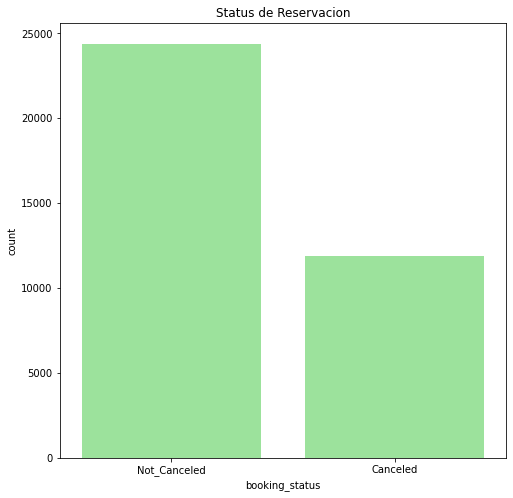

In [14]:
plt.figure(figsize=(8, 8))
sns.countplot(x= 'booking_status' ,data=df, color = 'lightgreen')
plt.title('Status de Reservacion')

In [16]:
df['booking_status'].replace({'Not_Canceled':0,'Canceled':1}, inplace=True)
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<AxesSubplot:>

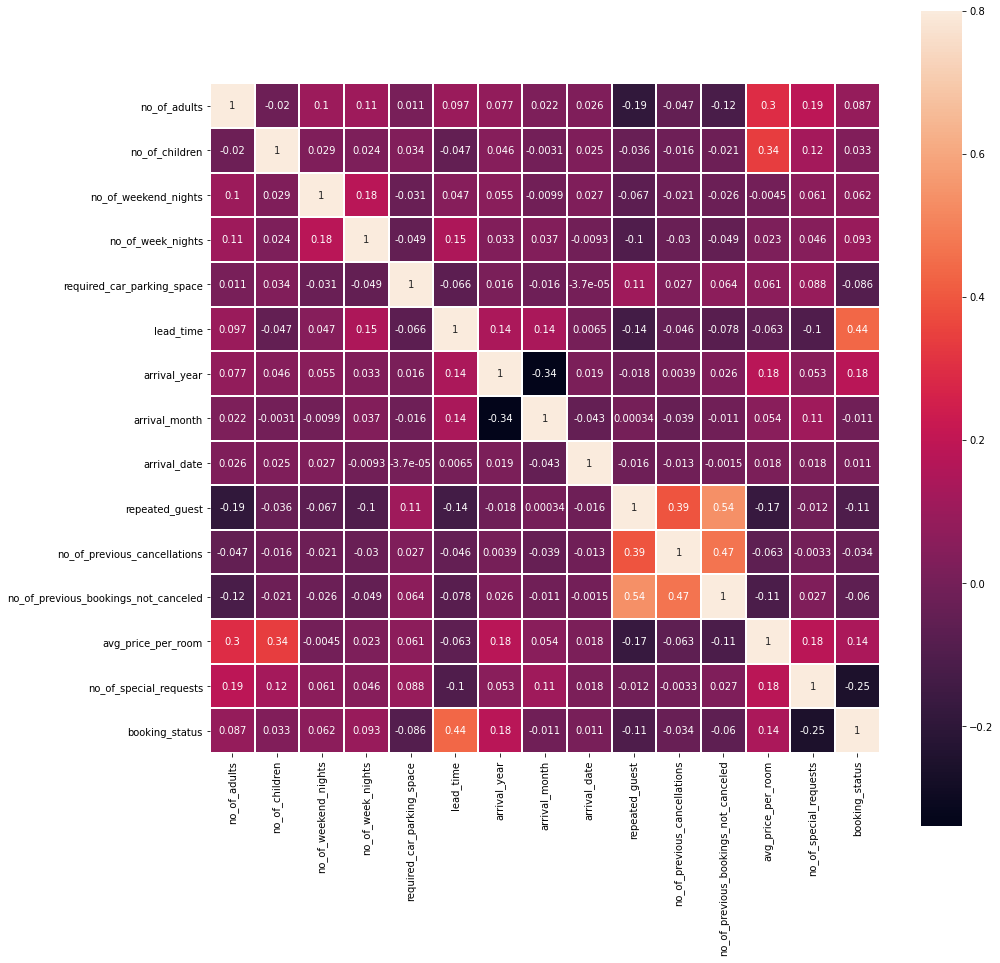

In [17]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

<AxesSubplot:>

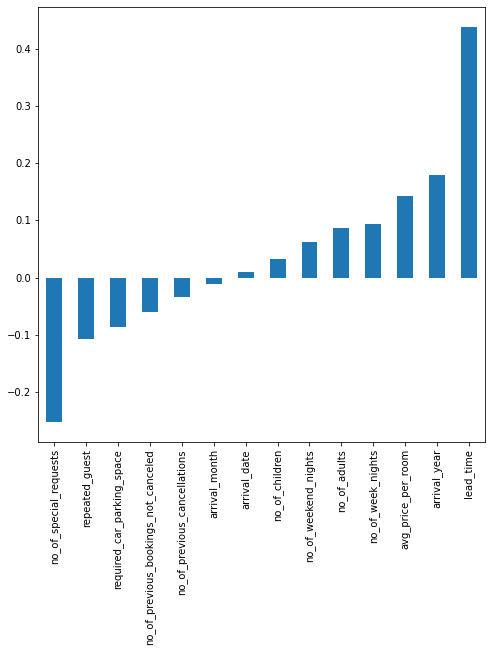

In [19]:
df.corr()['booking_status'].drop('booking_status').sort_values().plot(kind='bar',figsize=(8, 8))

## Analisis 

En terminos de correlacion el lead_time es la variable que tiene mayor nivel de correlacion para cancelacion, aunque no es muy fuerte la correlacion, tiene un sentido logico en esa variable. Que es el numero de dias entre la fecha de reservacion y la fecha de llegada.

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

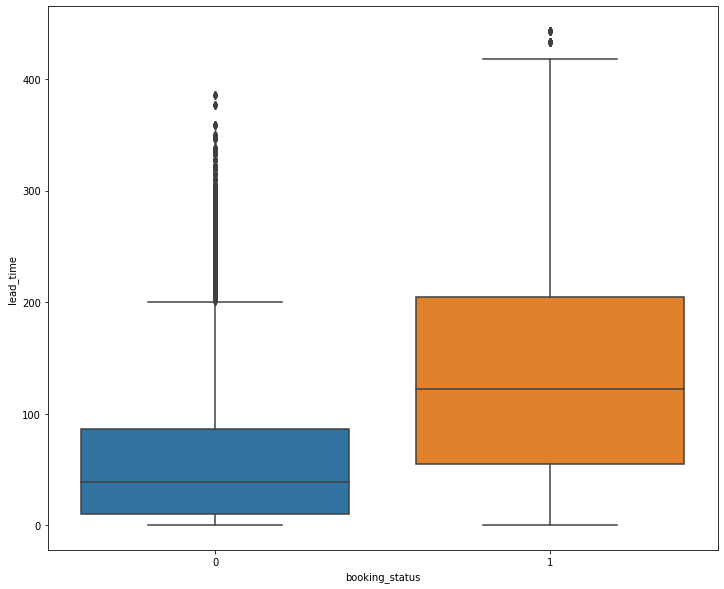

In [22]:
plt.figure(figsize=(12, 10))
sns.boxplot(y = 'lead_time', x = 'booking_status', data = df)

# Graficos 

<Figure size 864x720 with 0 Axes>

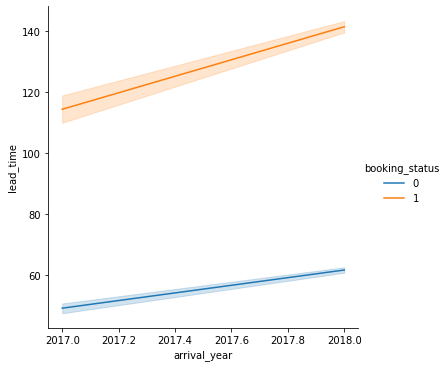

<Figure size 864x720 with 0 Axes>

In [26]:
sns.relplot(data=df, x ='arrival_year', y ="lead_time", hue='booking_status', kind="line")
plt.figure(figsize = (12, 10))

Text(0.5, 1.0, 'Canceled Reservation with Market Segment')

<Figure size 1080x1080 with 0 Axes>

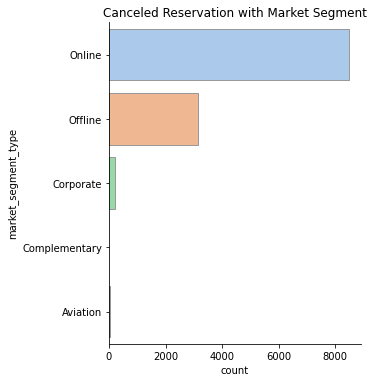

In [28]:
plt.figure(figsize=(15,15))
sns.catplot(data=df[df['booking_status'] == 1], y='market_segment_type', kind="count",palette="pastel", edgecolor = ".6",order = df.market_segment_type.value_counts().index)
plt.title('Canceled Reservation with Market Segment')

Text(0.5, 1.0, 'Not Canceled Reservation with Market Segment')

<Figure size 1080x1080 with 0 Axes>

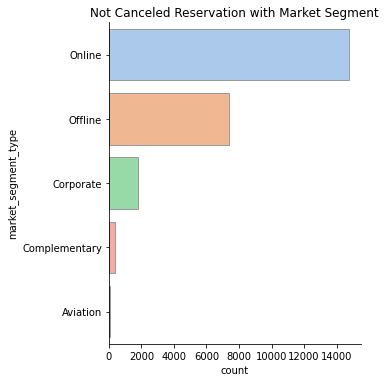

In [29]:
plt.figure(figsize=(15,15))
sns.catplot(data=df[df['booking_status'] == 0], y='market_segment_type', kind="count",palette="pastel", edgecolor = ".6",order = df.market_segment_type.value_counts().index)
plt.title('Not Canceled Reservation with Market Segment')

Text(0.5, 1.0, 'Cliente que regreso')

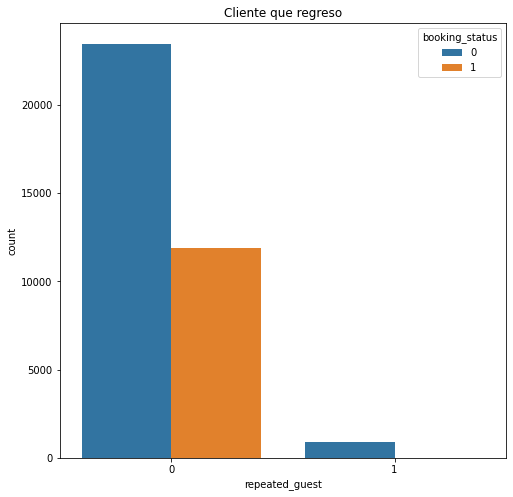

In [161]:
plt.figure(figsize=(8, 8))
sns.countplot(x= 'repeated_guest', hue='booking_status' , data=df)
plt.title('Cliente que regreso')

<AxesSubplot:xlabel='booking_status', ylabel='count'>

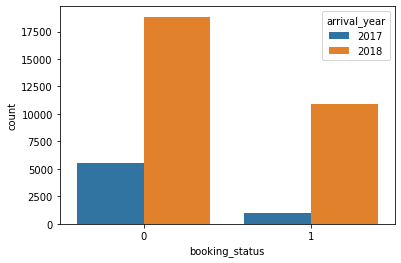

In [31]:
sns.countplot(x='booking_status', hue = "arrival_year", data=df)

Text(0.5, 1.0, 'Distribucion de Precios por si cancelan o no')

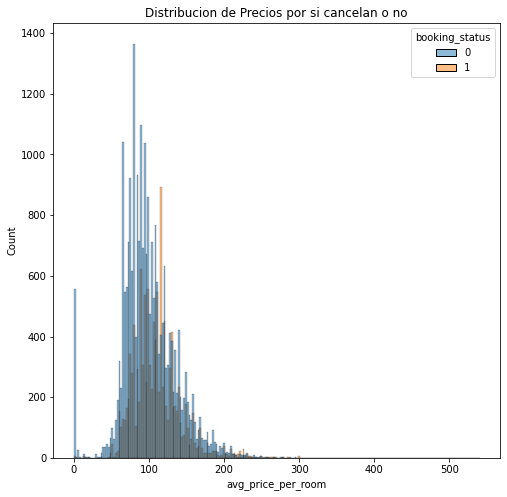

In [154]:
plt.figure(figsize=(8, 8))
sns.histplot(x= 'avg_price_per_room', hue='booking_status' , data=df)
plt.title('Distribucion de Precios por si cancelan o no')

<AxesSubplot:xlabel='arrival_month'>

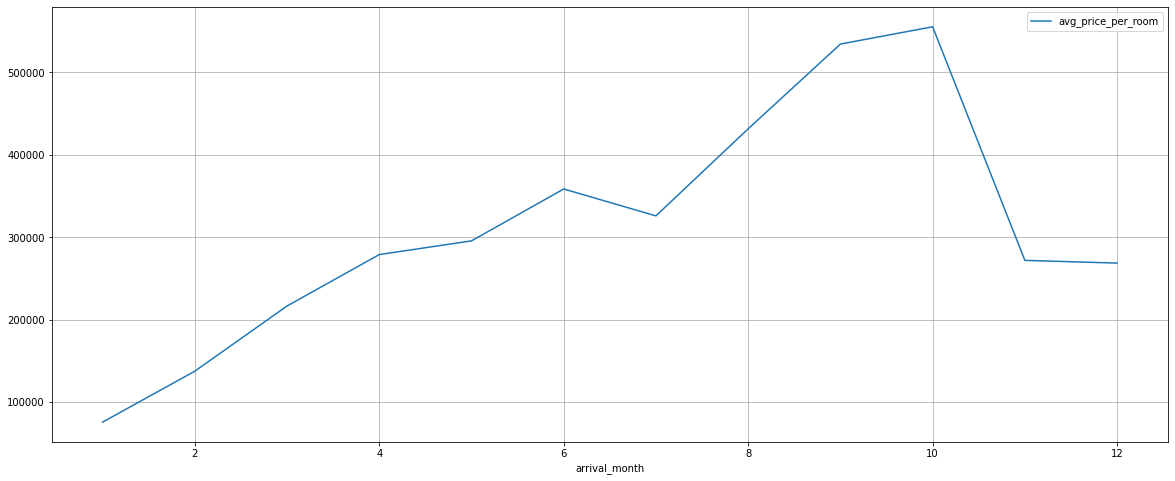

In [149]:
precio= df.groupby(["arrival_month"])[['avg_price_per_room']].sum()
precio.plot(figsize=(20,8), grid = True)

<AxesSubplot:xlabel='arrival_date'>

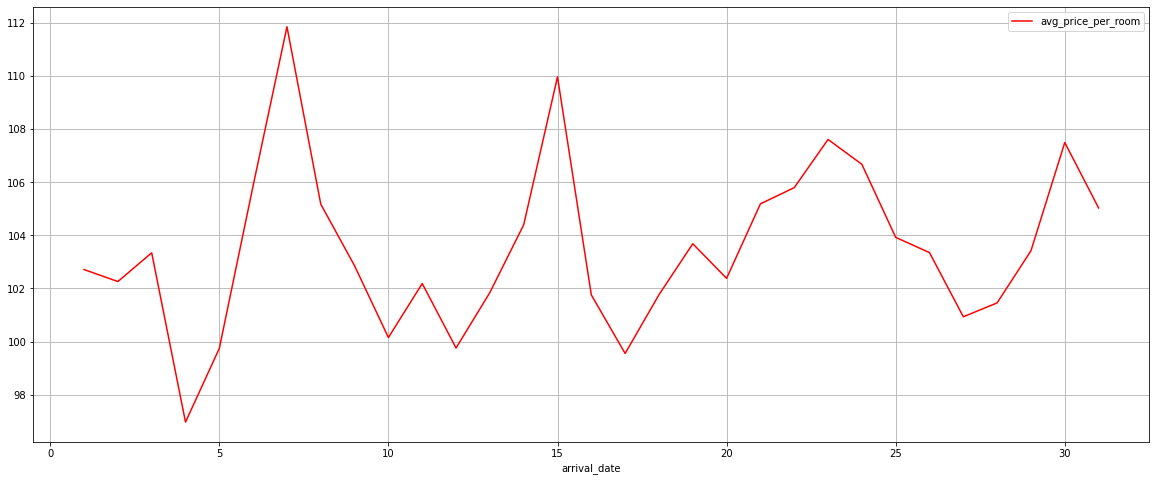

In [50]:
date = df.groupby(["arrival_date"])[['avg_price_per_room']].mean()
date.plot(figsize=(20,8),grid = True, color = 'r')

<Figure size 1440x1440 with 0 Axes>

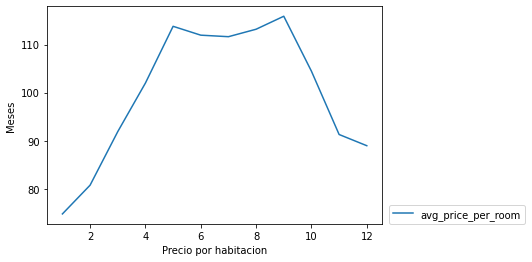

<Figure size 1440x1440 with 0 Axes>

In [68]:
df.pivot_table(values ='avg_price_per_room', index= 'arrival_month', aggfunc='mean').plot()
plt.ylabel('Meses ')
plt.xlabel('Precio por habitacion')
plt.legend(loc=(1.02,0))
plt.figure(figsize=(20,20))

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

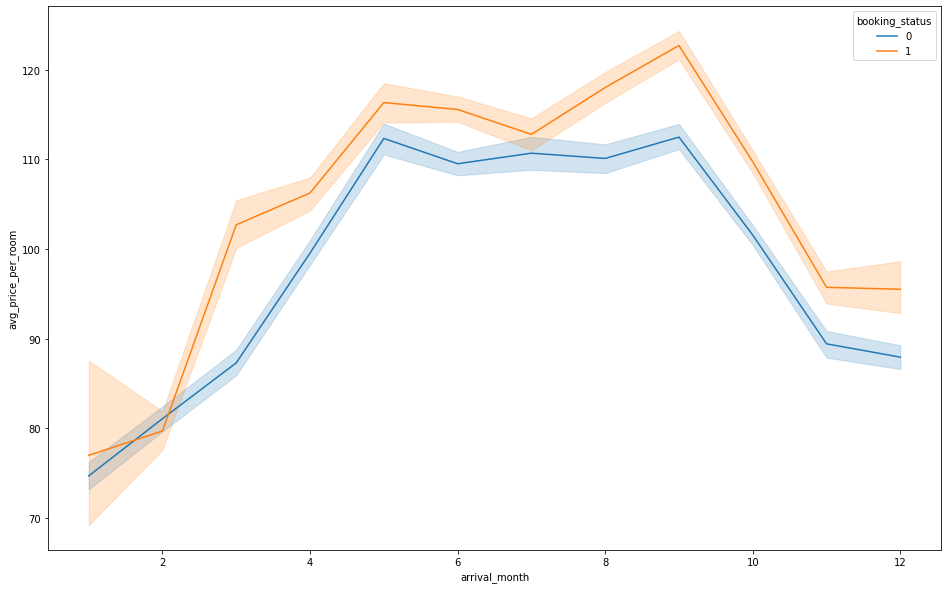

In [158]:
plt.figure(figsize = (16,10))
sns.lineplot(x ='arrival_month', y = 'avg_price_per_room', hue = 'booking_status', data = df)

<AxesSubplot:xlabel='arrival_date', ylabel='avg_price_per_room'>

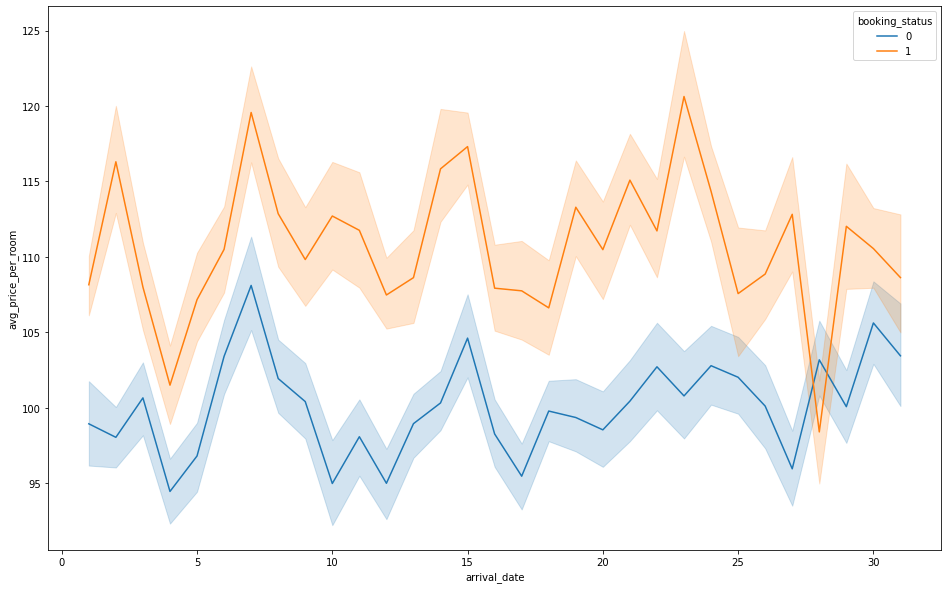

In [67]:
plt.figure(figsize = (16,10))
sns.lineplot(x ="arrival_date", y = 'avg_price_per_room', hue = 'booking_status', data = df)

<AxesSubplot:xlabel='arrival_month', ylabel='lead_time'>

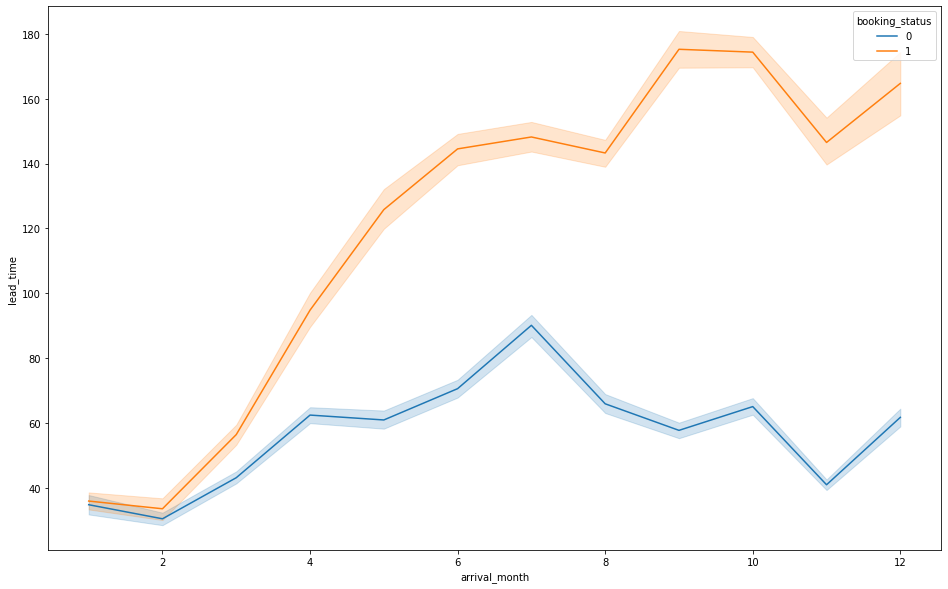

In [155]:
plt.figure(figsize = (16,10))
sns.lineplot(x = "arrival_month", y = 'lead_time', hue = 'booking_status', data = df)

Text(0.5, 1.0, 'Meses con las cancelaciones y los que no cancelaron')

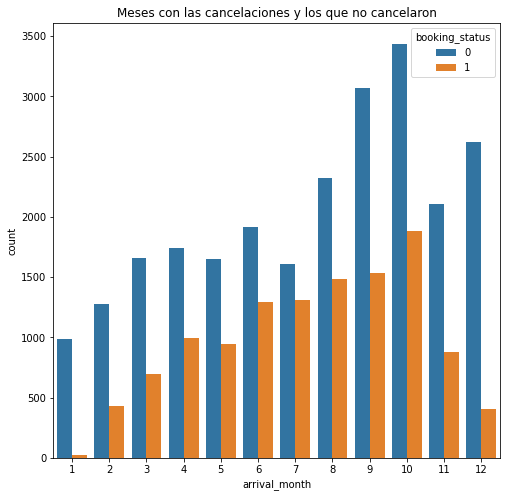

In [160]:
plt.figure(figsize=(8, 8))
sns.countplot(x='arrival_month', hue='booking_status' , data=df)
plt.title('Meses con las cancelaciones y los que no cancelaron')

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

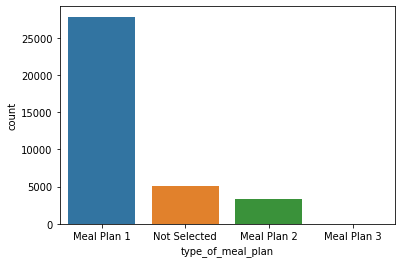

In [163]:
sns.countplot(x='type_of_meal_plan', data=df)

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

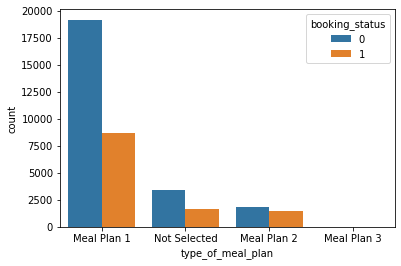

In [164]:
sns.countplot(x = 'type_of_meal_plan', hue = 'booking_status' ,data=df)

# Modelo 

In [73]:
# Dividir
X = df.drop(columns=['booking_status','Booking_ID'])
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [74]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [75]:
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [78]:
## Seleccionar

In [79]:
### Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [80]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [81]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [82]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [83]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde58b4c2e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde548f3eb0>)])

In [84]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde58b4c2e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde548f3eb0>)])

In [85]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [86]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot

print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (27206, 30)




array([[ 0.29945265,  2.20271537, -0.93285578, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29945265, -0.26128999, -0.93285578, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29945265, -0.26128999,  3.68134799, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.29945265, -0.26128999, -0.93285578, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.29945265, -0.26128999, -0.93285578, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29945265, -0.26128999, -0.93285578, ...,  0.        ,
         0.        ,  1.        ]])

# Machine Learning 

In [90]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier( )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.9181798132764831
Testing accuracy: 0.8941448891829309


## XGBOOST

In [92]:
xgb = xgb.predict(X_test)

In [93]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6043
           1       0.87      0.80      0.83      3026

    accuracy                           0.89      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.89      0.89      0.89      9069



<Figure size 432x288 with 0 Axes>

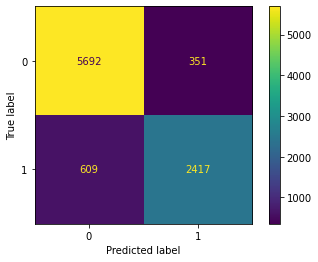

In [94]:
cm = confusion_matrix(y_test,xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

## Random Forest 

In [102]:
rf = RandomForestClassifier(random_state = 42, max_depth = 200 )

In [103]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions=predictions.round(0)
predictions=predictions.astype(int)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6043
           1       0.89      0.81      0.85      3026

    accuracy                           0.91      9069
   macro avg       0.90      0.88      0.89      9069
weighted avg       0.90      0.91      0.90      9069



In [104]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Training accuracy:',rf_train_score)
print('Testing accuracy:',rf_test_score)

Training accuracy: 0.9941924575461295
Testing accuracy: 0.9053919947072444


<Figure size 432x288 with 0 Axes>

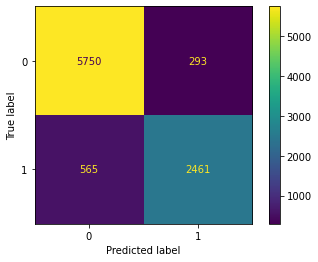

In [106]:
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

In [107]:
logreg_pipe = make_pipeline(rf)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=200, random_state=42))])

In [108]:
# Calculate AUC for both training and testing sets

print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.999308676542222
Testing AUC: 0.9582406446245179


In [109]:
### Curva Roc de Random Forest

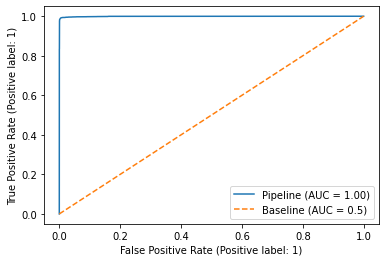

In [110]:
# Visualize the ROC curve
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();


## Redes Neuronales 

In [137]:
input_shape = X_train.shape[1]
input_shape

30

In [138]:
# Sequential model
model = Sequential()

In [139]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer.
                input_dim = input_shape, activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(25, # How many neurons you have in your second hidden layer
                activation = 'relu',kernel_regularizer=l2(0.01))) # What activation function are you using?, Usamos el l2 desde la 3ra capa oculta
model.add(Dense(25, # How many neurons you have in your second hidden layer
                activation = 'relu',kernel_regularizer=l2(0.01))) # What activation function are you using?

In [140]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [141]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ["accuracy"])

In [142]:
# Step 3: Fit our model
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=150, callbacks = [early_stopping])

Epoch 1/150
851/851 [==============================] - 3s 3ms/step - loss: 0.5599 - accuracy: 0.7963 - val_loss: 0.4403 - val_accuracy: 0.8183
Epoch 2/150
851/851 [==============================] - 3s 3ms/step - loss: 0.4278 - accuracy: 0.8220 - val_loss: 0.4180 - val_accuracy: 0.8262
Epoch 3/150
851/851 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8271 - val_loss: 0.4107 - val_accuracy: 0.8260
Epoch 4/150
851/851 [==============================] - 2s 2ms/step - loss: 0.4041 - accuracy: 0.8298 - val_loss: 0.4042 - val_accuracy: 0.8174
Epoch 5/150
851/851 [==============================] - 3s 3ms/step - loss: 0.3974 - accuracy: 0.8331 - val_loss: 0.3979 - val_accuracy: 0.8267
Epoch 6/150
851/851 [==============================] - 3s 3ms/step - loss: 0.3930 - accuracy: 0.8321 - val_loss: 0.3921 - val_accuracy: 0.8285
Epoch 7/150
851/851 [==============================] - 3s 4ms/step - loss: 0.3891 - accuracy: 0.8346 - val_loss: 0.3933 - val_accuracy: 0.8267

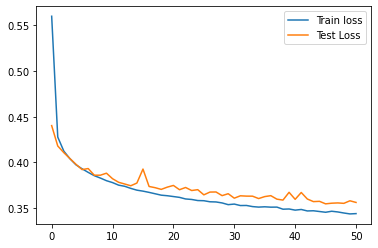

In [143]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();


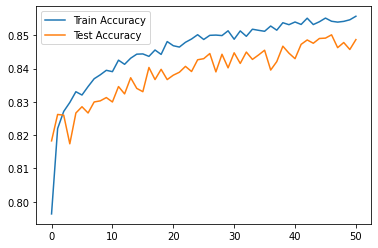

In [144]:
# Visualize the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

## Evaluar el modelo

In [146]:
predictions = model.predict(X_test)
predictions = np.round(predictions)
print(classification_report(y_test,predictions))

284/284 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6043
           1       0.80      0.73      0.76      3026

    accuracy                           0.85      9069
   macro avg       0.83      0.82      0.83      9069
weighted avg       0.85      0.85      0.85      9069



In [147]:
print(confusion_matrix(y_test,predictions))

[[5488  555]
 [ 817 2209]]


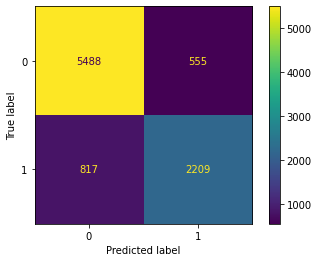

<Figure size 576x576 with 0 Axes>

In [148]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(8, 8))
plt.show()